In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Load dataset

In [17]:
df = pd.read_csv('house_data.csv', usecols=['price', 'sqft_living'])
df.corr()

,price,sqft_living
price,1.00000,0.43041
sqft_living,0.43041,1.00000


In [ ]:
#Convert square foots to square meters
df['sqmt'] = df['']

<Axes: >

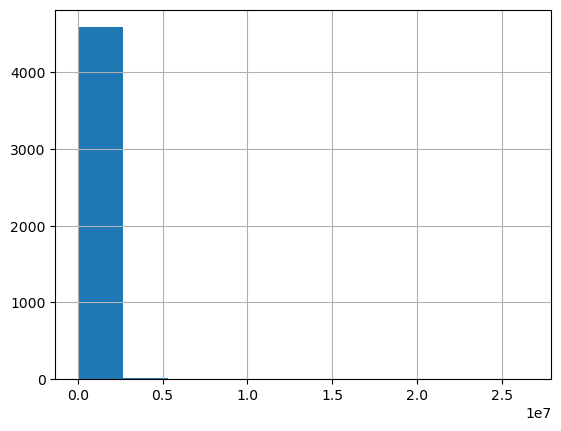

In [8]:
df['price'].hist()

In [20]:
#Delete outlier
q25, q75 = np.percentile(df, [25, 75])
iqr_price = stats.iqr(df['price']) #Rango interquartil
inf_price = q25 - (1.5*iqr_price) #Limite inferior price
up_price = q75 + (1.5*iqr_price) #Limite superior price
df = df[(df['price'] > inf_price) 
        & (df['price'] < up_price)]

<Axes: >

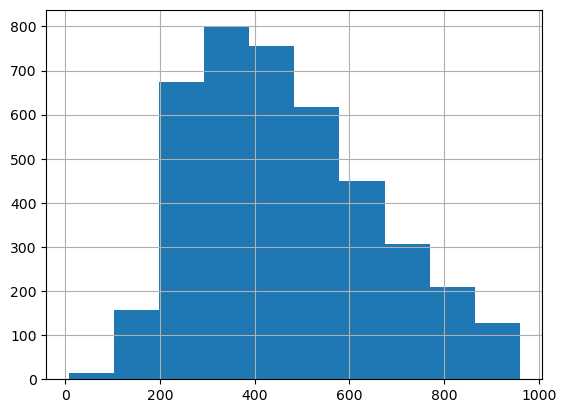

In [31]:
df = df[df['sqft_living'] < 4000]
df = df[df['price'] > 0]
df['price'].hist()

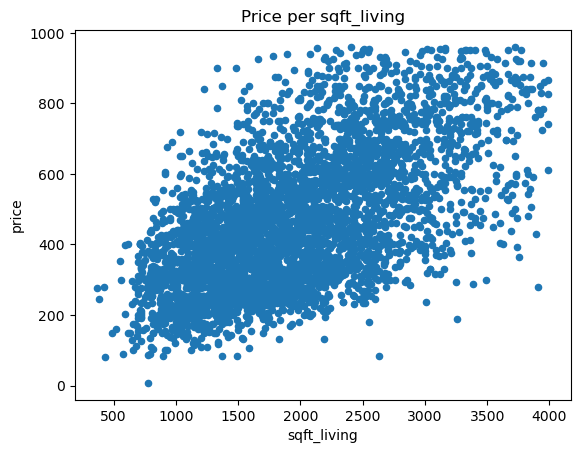

In [24]:
df2 = df
df2['price'] = df2['price']/1000
df2.plot(y='price', x='sqft_living', kind='scatter')
plt.title('Price per sqft_living')
plt.show()

In [25]:
training = df.sample(frac=0.7, random_state=25)
test = df.drop(training.index)

print(f'Number of training dataset: {training.shape[0]}')
print(f'Number of training dataset: {test.shape[0]}')

Number of training dataset: 2875
Number of training dataset: 1232


<Axes: xlabel='sqft_living', ylabel='price'>

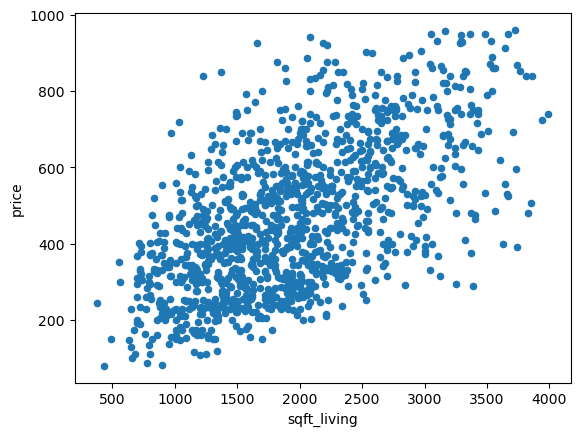

In [26]:
test.plot(y='price', x='sqft_living', kind='scatter')